- 欠損値は消す
- 半分以上欠損値の場合は列ごと消す
- PCAにかける
- 第一成分と第二主成分をプロットする
  - 目的変数の色に分けて出力

- サポートベクターマシンを使って分類も
- ROCカーブ　LAC出力

paccenger_id name ticket

行はcabbin 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv('./titanic_data/train.csv')
test = pd.read_csv('./titanic_data/test.csv')
gender_submission = pd.read_csv('./titanic_data/gender_submission.csv')


In [3]:
gender_submission.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# データの前処理

In [6]:
data = pd.concat([train, test], sort=False)
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# データの欠損値が多いデータを確認
data.isnull().sum()[data.isnull().sum()>0].sort_values(ascending=False)


Cabin       1014
Survived     418
Age          263
Embarked       2
Fare           1
dtype: int64

In [8]:
# Cabin、PassengerIdとTicketとNameの欠損値が多いので、列ごと削除
data.drop(['Cabin', 'PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)

# survivedとAgeとEmbarkedの欠損値のある行を削除
data.dropna(subset=['Survived', 'Age', 'Embarked', 'Fare'], inplace=True)


In [14]:
# SEXを数値に変換
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)

# Embarkedを数値に変換
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)

data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,0,22.0,1,0,7.2500,0
1,1.0,1,1,38.0,1,0,71.2833,1
2,1.0,3,1,26.0,0,0,7.9250,0
3,1.0,1,1,35.0,1,0,53.1000,0
4,0.0,3,0,35.0,0,0,8.0500,0


In [15]:
# train_test_split
from sklearn.model_selection import train_test_split

X = data.drop(['Survived'], axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)


# 標準化

In [16]:
# 標準化(Xデータのうち、数値データのみ)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)     # X_trainの平均と標準偏差を計算
X_train = scaler.transform(X_train)  # X_trainを変換
X_test = scaler.transform(X_test)   # X_testを変換
# X_train.head()


# PCAにかける（主成分分析）

In [17]:
# PCAを用いて次元削減
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
# X_train_pca = pca.transform(X_train[['Age', 'Fare']])
# X_test_pca = pca.transform(X_test[['Age', 'Fare']])
pca.explained_variance_ratio_
X_train_pca[:5]


array([[-1.53176527, -0.19030874,  0.02347461,  0.16146145, -0.43933783,
         0.44315473,  0.2290913 ],
       [-0.1626791 ,  4.61006045, -1.59272488,  2.11199912,  0.10852502,
        -1.90428132,  0.05776447],
       [ 1.34558756,  0.34023535, -0.26848295, -1.35346295, -0.45072979,
         0.74699905, -0.85108776],
       [-0.67174302, -0.80850707, -0.44646544,  0.10973452, -0.32800538,
         0.21328985, -0.39134445],
       [-0.76891787, -0.78521995,  1.41047534,  1.02019354,  0.56593618,
        -0.01124292,  0.22593436]])

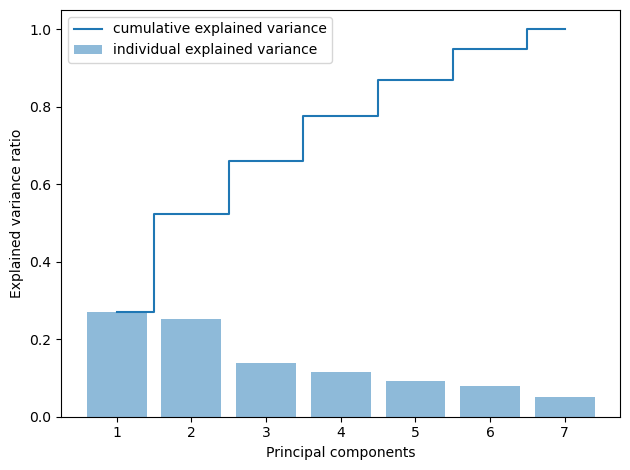

In [18]:
# 累積寄与率を確認
# 累積分布寄与率とは、各主成分の寄与率を累積したもの
var_exp = pca.explained_variance_ratio_     # 各次元の寄与率
cum_var_exp = np.cumsum(var_exp)            # 累積寄与率

plt.bar(range(1, 8), var_exp, align='center', label='individual explained variance')
plt.step(range(1, 8), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [25]:
# PC1, 2の因子負荷量を確認
pd.DataFrame(pca.components_, columns=X.columns).iloc[:, :2]


,Pclass,Sex
0,-0.569704,0.339306
1,0.256094,0.253933
2,0.255640,0.334102
3,0.040986,-0.812717
4,0.220887,0.042233
5,0.049862,-0.186231
6,0.701102,0.108586


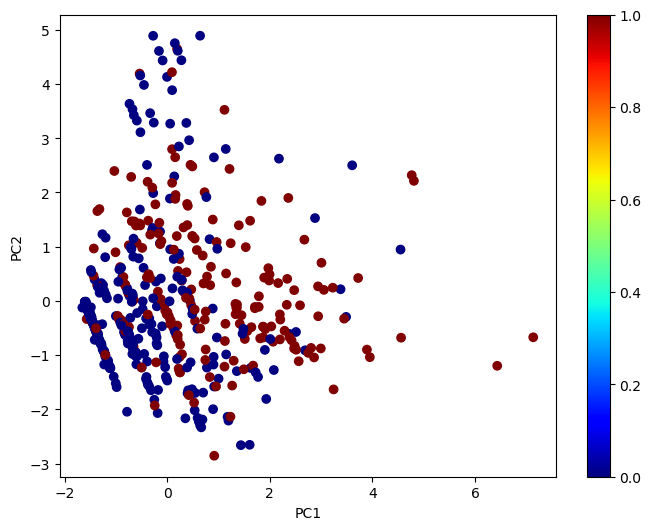

In [20]:
# 第1,2主成分スコアをプロット（目的変数で色分け）
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='jet')
plt.xlabel('PC1')
plt.ylabel('PC2')
# 赤が死亡、青が生存
plt.colorbar()
plt.show()


/Users/fukunagaatsushi/miniforge3/envs/miyata-text/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


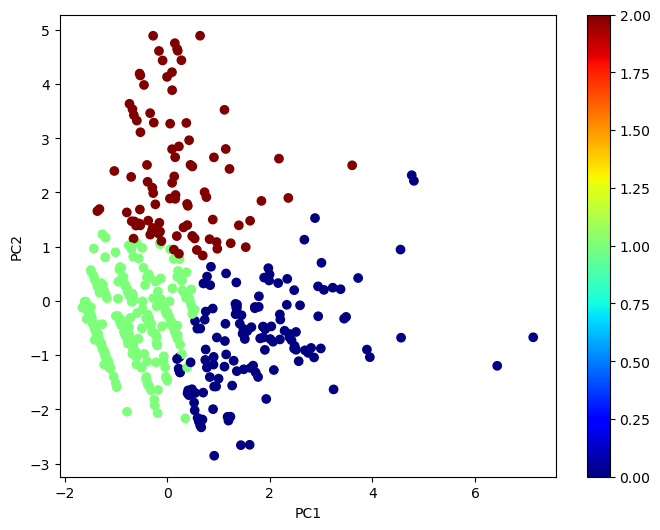

In [21]:
# 上のグラフをk=3meansで色分け
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_train_pca)
y_pred = kmeans.predict(X_train_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_pred, cmap='jet')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()


# SVM

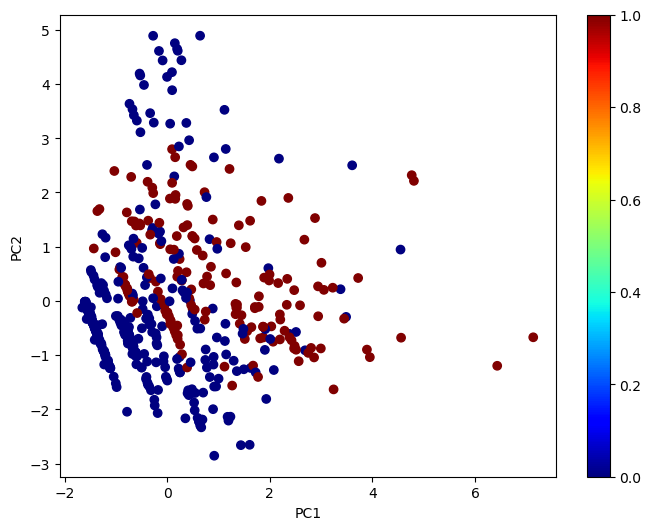

In [22]:
# PC1とPC2からSVM（カーネルはRBF）で生存予測
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0, probability=True)
svm.fit(X_train_pca, y_train)
y_pred = svm.predict(X_train_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_pred, cmap='jet')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()


In [23]:
# confusion matrixとは、予測値と正解値をクロス集計したもの
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_train, y_pred=y_pred)
confmat


# accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_pred)


0.8520599250936329

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       318
         1.0       0.89      0.72      0.80       216

    accuracy                           0.85       534
   macro avg       0.86      0.83      0.84       534
weighted avg       0.86      0.85      0.85       534



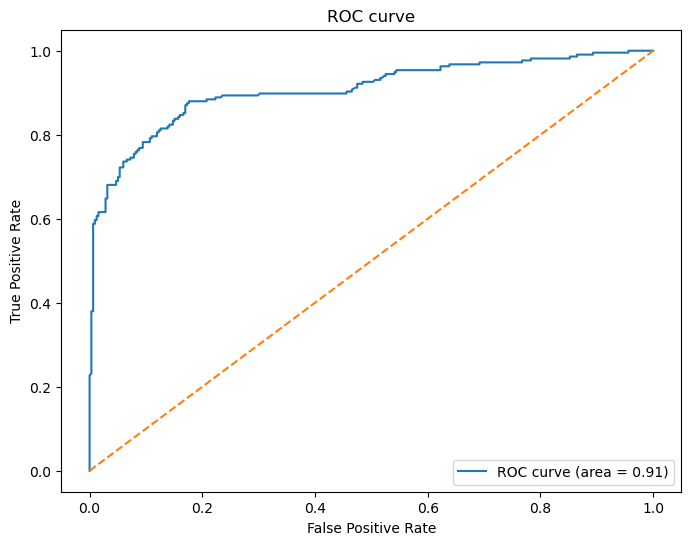

In [24]:
# classification reports
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred))


# ROC曲線
from sklearn.metrics import roc_curve, auc

y_pred_proba = svm.predict_proba(X_train_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

plt.legend(loc="lower right")
plt.show()
